In [3]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# setting print options for numbers
np.set_printoptions(precision=5, suppress=True)  

# tutorial is on the basis of the online tutorial:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [ ]:
# run hierarchical clustering on the synthetic datasets:

In [ ]:
# generate the linkage matrix
Z = linkage(X, method='ward') # setting a method (e.g. 'ward')


In [ ]:
# generate data (two clusters: a with 100 points, b with 50)
np.random.seed(4711)  # for repeatability of the analysis
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

# plot data
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# check the cophenetic correlation coefficient
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c #cophenetic correlation coefficient

## notice: cophenetic correlation coefficient
# compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering
# the closer the value is to 1, the better the clustering preserves the original distances

In [ ]:
Z[:25] # shows 25 first cluster merges (resulting array has the format [idx1, idx2, dist, sample_count])

In [ ]:
# plot full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## notice: how to read a dendrogram plot
# a dendrogram is a visualization in form of a tree 
# showing the order and distances of merges during the hierarchical clustering

# on the x axis you see labels (if you don't specify anything else they are the indices of your samples)
# on the y axis you see the distances (e.g. of the specified linkage method)
# horizontal lines are cluster merges
# vertical lines tell you which clusters/labels were part of merge forming that new cluster
# heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

## notice: color notation
# if not specified, the color_threshold argument of dendrogram() will automagically pick a distance cut-off value
# of 70% of the final merge and then color the first clusters below that in individual colors
# (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [ ]:
Z[-10:] # shows 10 last merges (resulting array has the format [idx1, idx2, dist, sample_count])

## notice: huge distance jumps in the dendrogram indicate that something is merged, but perhaps shouldn't be merged

In [ ]:
# plot truncated dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index (or cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
    show_leaf_counts=False,  # to get cluster sizes (numbers in brackets are counts)
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
)
plt.show()

## notice: most labels are missing (all other samples were already merged into clusters before the last p merges)

In [ ]:
# adding cluster distances and a cut-off line
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
# plot fancy dendrogram
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=50,  # set max distance and plot a horizontal cut-off line
)
plt.show()

In [ ]:
# retrieve clusters
from scipy.cluster.hierarchy import fcluster
max_d = 50 # max distance criterion
clusters = fcluster(Z, max_d, criterion='distance')

cluster_number = 1
indices_cluster = np.ndarray.tolist(np.where(clusters==cluster_number)[0][:])
print indices_cluster

In [ ]:
# plot the retrieved clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [2]:
# run hierarchical clustering on the exemplary fMRI datasets:

In [67]:
# load data (fMRI data)
df1  = pd.read_csv("100307.csv")
X  = df1.values
Nvars = X.shape[1]

labels_Glasser  = pd.read_csv("labels_Glasser.csv",header=None)[0].tolist()

In [68]:
# generate the linkage matrix (distance matrix)
# ROIs/variables should be in rows, not in columns! --> you need to traspose the data first:
Z = linkage(np.transpose(X), method='ward')

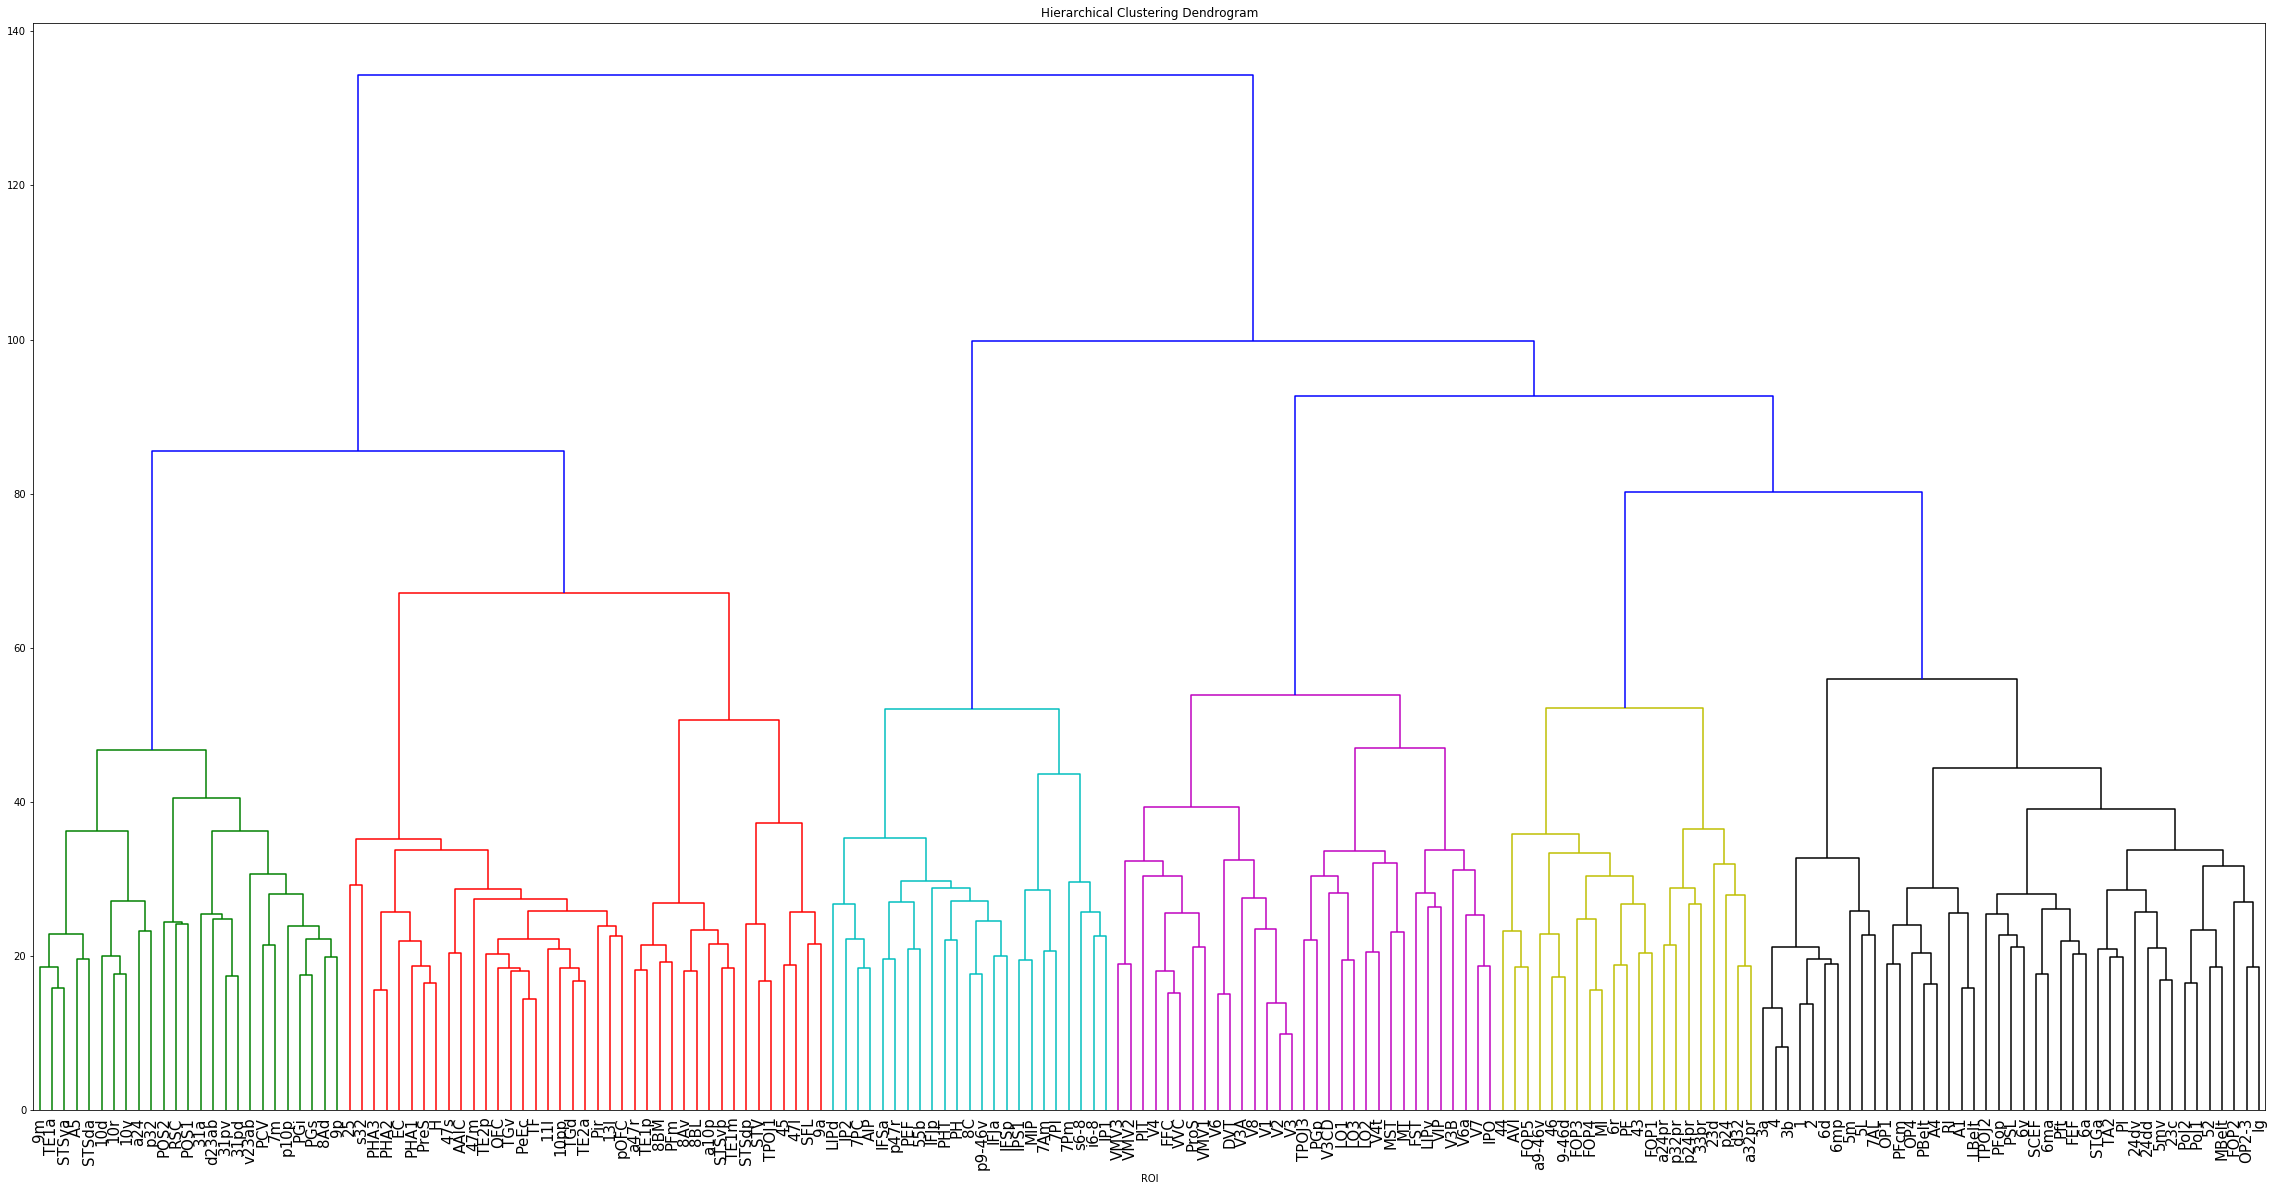

In [69]:
# plot full dendrogram:
plt.figure(figsize=(40, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ROI')
plt.ylabel('')
R = dendrogram(
    Z,
    labels=labels_Glasser,
    leaf_rotation=90.,   # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    color_threshold=70   # set the dostance at which clusters are getting colored
)
plt.show()

In [70]:
# read the output from the dendrogram:
print R.keys()

['ivl', 'dcoord', 'leaves', 'color_list', 'icoord']


In [91]:
# retrieve clustersL
from scipy.cluster.hierarchy import fcluster
max_d = 70 # max distance criterion
clusters = fcluster(Z, max_d, criterion='distance')

cluster_number = 1
indices_cluster = np.ndarray.tolist(np.where(clusters==cluster_number)[0][:])
l# retrieve clusters
from scipy.cluster.hierarchy import fcluster
max_d = 70 # max distance criterion
clusters = fcluster(Z, max_d, criterion='distance')

cluster_number = 1
indices_cluster = np.ndarray.tolist(np.where(clusters==cluster_number)[0][:])
labels_cluster = [labels_Glasser[i] for i in indices_cluster]
print labels_cluster

['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'b', 'b', 'b', 'b']
['RSC', 'POS2', 'PCV', '7m', 'POS1', 'v23ab', 'd23ab', '31pv', 'a24', 'p32', '10r', '8Ad', '9m', '9p', '

In [34]:
# compare with another subject:
# load data (fMRI data)
df1  = pd.read_csv("101410.csv")
X  = df1.values
Nvars = X.shape[1]

labels_Glasser  = pd.read_csv("labels_Glasser.csv",header=None)[0].tolist()

In [35]:
# generate the linkage matrix (distance matrix)
# ROIs/variables should be in rows, not in columns! --> you need to traspose the data first:
Z = linkage(np.transpose(X), method='ward')

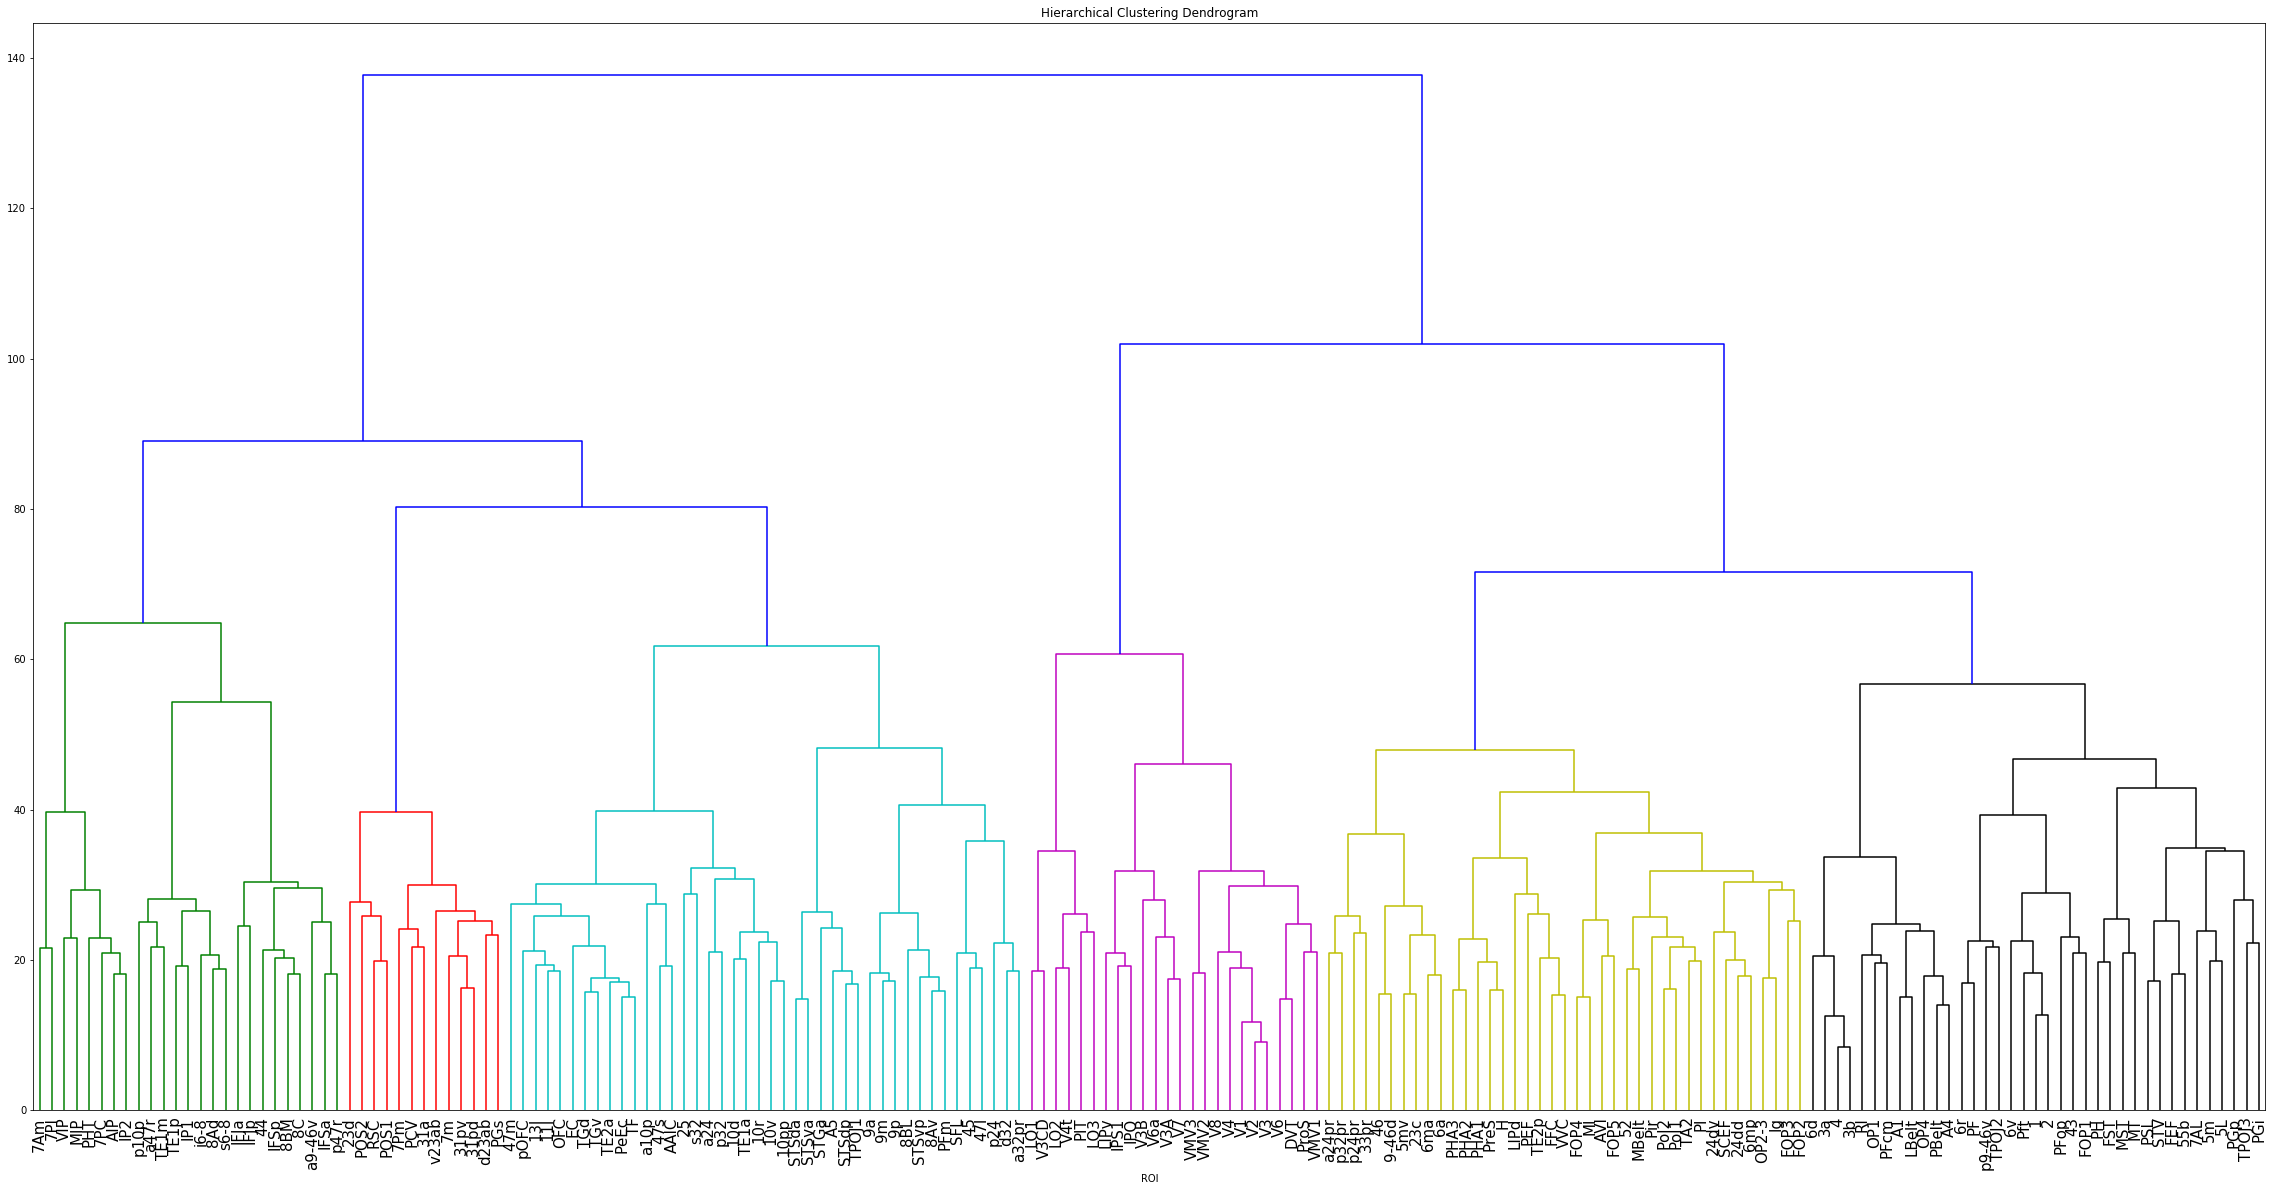

In [36]:
# plot full dendrogram:
plt.figure(figsize=(40, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ROI')
plt.ylabel('')
R = dendrogram(
    Z,
    labels=labels_Glasser,
    leaf_rotation=90.,   # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    color_threshold=70   # set the dostance at which clusters are getting colored
)
plt.show()

In [38]:
# retrieve clusters:
from scipy.cluster.hierarchy import fcluster
max_d = 70 # max distance criterion
clusters = fcluster(Z, max_d, criterion='distance')

cluster_number = 1
indices_cluster = np.ndarray.tolist(np.where(clusters==cluster_number)[0][:])
l# retrieve clusters
from scipy.cluster.hierarchy import fcluster
max_d = 70 # max distance criterion
clusters = fcluster(Z, max_d, criterion='distance')

cluster_number = 1
indices_cluster = np.ndarray.tolist(np.where(clusters==cluster_number)[0][:])
labels_cluster = [labels_Glasser[i] for i in indices_cluster]
print labels_cluster

['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b', 'b', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'b', 'b', 'b']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2